# **Лабораторная работа 9.1 Титаник ML**

1.Загрузить файл, разделить его на train и test. Для test взять 10% случайно выбранных строк таблицы.

2.Обучить модели: Decision Tree, XGBoost, Logistic Regression из библиотек sklearn и xgboost. Обучить модели предсказывать столбец label по остальным столбцам таблицы.

3.Наладить замер Accuracy - доли верно угаданных ответов.
Точности всех моделей не должны быть ниже 85%

4.С помощью Decision Tree выбрать 2 самых важных признака и проверить точность модели, обученной только на них. 

In [ ]:
!pip install scikit-learn==1.2.1


In [159]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [160]:
df_titanic = pd.read_csv("/content/titanic_prepared.csv")
df_titanic

,Unnamed: 0,sex,row_number,liters_drunk,drink,check_number,label,age_child,age_adult,age_old,morning,day,evening
0,0,0,90.0,1.0,1,8092,1,False,False,True,False,False,True
1,1,0,81.0,4.0,1,4252,1,False,True,False,False,True,False
2,2,1,14.0,3.0,0,6913,1,False,False,True,False,False,True
3,3,1,0.0,1.0,0,8479,1,False,False,True,False,True,False
4,4,1,84.0,1.0,0,6279,0,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6629,6629,1,55.0,2.0,0,1526,1,False,False,True,False,False,True
6630,6630,1,75.0,5.0,1,6690,0,False,False,True,False,True,False
6631,6631,1,1.0,2.0,1,2834,0,False,True,False,True,False,False
6632,6632,1,68.0,4.0,0,5126,1,False,True,False,False,True,False


In [161]:
def scale_data(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

In [162]:
df_titanic = df_titanic.astype(int)
df_titanic = df_titanic.drop(['Unnamed: 0','row_number','check_number'], axis=1)
df_titanic

,sex,liters_drunk,drink,label,age_child,age_adult,age_old,morning,day,evening
0,0,1,1,1,0,0,1,0,0,1
1,0,4,1,1,0,1,0,0,1,0
2,1,3,0,1,0,0,1,0,0,1
3,1,1,0,1,0,0,1,0,1,0
4,1,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
6629,1,2,0,1,0,0,1,0,0,1
6630,1,5,1,0,0,0,1,0,1,0
6631,1,2,1,0,0,1,0,1,0,0
6632,1,4,0,1,0,1,0,0,1,0


In [163]:
def separation(df):
  train, validate, test = np.split(df.sample(frac=1, random_state=10),
                                 [int(.8 * len(df)), int(.9 * len(df))])
  return train,validate,test

In [182]:
X = df_titanic.drop(['label'], axis=1)
Y = df_titanic['label']
X = X.fillna(X.median())
Y = Y.fillna(Y.median())
X = X.dropna()
Y = Y.dropna()

In [177]:
train_x,validate_x,test_x = separation(X)
train_y,validate_y,test_y = separation(Y)

train_x = scale_data(train_x)
# train_y = scale_data(train_y)
validate_x = scale_data(validate_x)
# validate_y = scale_data(validate_y)
test_x = scale_data(test_x)
# test_y = scale_data(test_y)

In [166]:
def get_accuracy(model, xtest, ytest):
    predict = model.predict(xtest)
    return accuracy_score(ytest, predict)

# Decision Tree

In [192]:
def dt(xtrain,ytrain,xvalidate,yvalidate):
  cls = DecisionTreeClassifier()
  param = {
      'criterion':['gini', 'entropy', 'log_loss'],
      'max_depth': range(1,50,1),
      
          }
  grid = GridSearchCV(cls, param)
  grid.fit(xtrain,ytrain)
  criterion = grid.best_params_.get('criterion')
  max_depth = grid.best_params_.get('max_depth')
  model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
  model.fit(xtrain,ytrain)
  predict = model.predict(xvalidate)
  print(predict)
  acc = accuracy_score(yvalidate,predict)
  print(f'Лучшие параметры:\n{grid.best_params_}')
  print('Лучшая accuracy на валидации: {:.2%}'.format(acc))
  return model



In [187]:
# for i in train_x:
#   print(i)

In [193]:
# for i in validate_x:
#   if np.isnan(i.any()):
#     print('hui')

model = dt(train_x,train_y,validate_x,validate_y)
acc = get_accuracy(model,test_x,test_y)
print('Accuracy на тесте: {:.2%}'.format(acc))

[1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0
 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1
 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 1 0 1 0 

In [202]:
!wget https://c.xn--365-nedebej.net/uploads/posts/2020-07/1594042093_1.jpg

--2023-02-20 19:11:22--  https://c.xn--365-nedebej.net/uploads/posts/2020-07/1594042093_1.jpg
Resolving c.xn--365-nedebej.net (c.xn--365-nedebej.net)... 104.21.91.6, 172.67.163.252, 2606:4700:3033::ac43:a3fc, ...
Connecting to c.xn--365-nedebej.net (c.xn--365-nedebej.net)|104.21.91.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38756 (38K) [image/jpeg]
Saving to: ‘1594042093_1.jpg’

1594042093_1.jpg    100%[===================>]  37.85K  --.-KB/s    in 0.002s  

2023-02-20 19:11:23 (17.7 MB/s) - ‘1594042093_1.jpg’ saved [38756/38756]



In [195]:
import cv2
from google.colab.patches import cv2_imshow

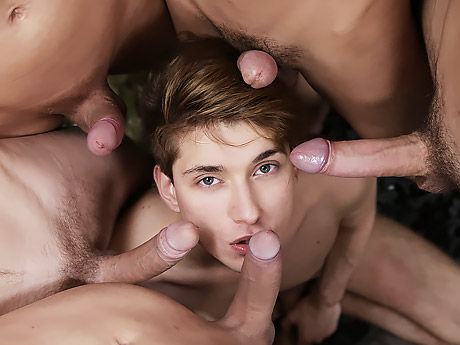

In [204]:
img = cv2.imread('1594042093_1.jpg')
cv2_imshow(img)

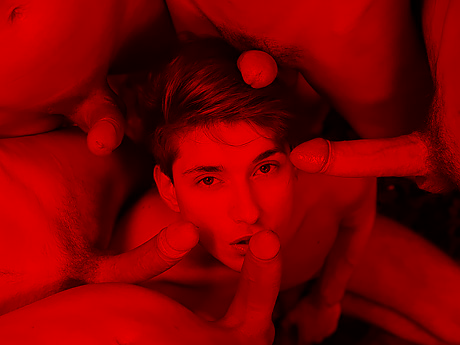

In [205]:
img_red = img.copy()
img_red[:, :, 0: 2] = 0

cv2_imshow(img_red)

In [206]:
img.shape

(345, 460, 3)

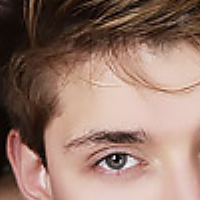

In [210]:
ins = np.array([[150, 100], [250, 100], [150, 200], [250, 200]], dtype = np.float32)
out = np.array([[0, 0], [200, 0], [0, 200], [200, 200]], dtype = np.float32)

M = cv2.getPerspectiveTransform(ins, out)
img_tr = cv2.warpPerspective(img, M, (200, 200))

cv2_imshow(img_tr)